## Лабораторная 3

**Изучить и реализовать MLP (многослойная искусственная нейронная сеть) для классификации нелинейно разделимых данных.**

1. Сгенерируйте данные (любым методом из sklearn.datasets).
2. Визуализируйте данные на плоскости.
3. Создайте MLP: вход (2 нейрона), скрытый слой (4 нейрона, ReLU), выход (1 нейрон, sigmoid) - можете использовать pytorch / keras
4. Разделите данные (80% — обучение, 20% — тест).
5. Обучите на 1000 эпох, постройте график потерь.
6. Оцените точность на тесте.


In [5]:
!pip install scikit-learn tensorflow plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 10.2 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [29]:
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import roc_auc_score, roc_curve

import plotly.graph_objects as go

In [2]:
X, y = make_moons(
    n_samples=1000,
    random_state=42,
)

In [3]:
X

array([[ 0.00872719,  0.36817352],
       [ 0.921384  , -0.49690497],
       [ 0.94022577, -0.49821192],
       ...,
       [ 1.64091013, -0.26761592],
       [-0.91991616,  0.39211512],
       [ 0.80079841,  0.59893397]], shape=(1000, 2))

In [4]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [11]:
fig = go.Figure()

fig.update_layout(
    title='Cluster Visualization',
    plot_bgcolor='white',
    width=700,
    height=600,
    xaxis_title='x_0',
    yaxis_title='x_1',
)

idx0 = (y == 0)
idx1 = (y == 1)

fig.add_trace(go.Scatter(
    x=X[idx0, 0],
    y=X[idx0, 1],
    mode='markers',
    marker=dict(size=5, color='blue'),
    name='type 0',
))

fig.add_trace(go.Scatter(
    x=X[idx1, 0],
    y=X[idx1, 1],
    mode='markers',
    marker=dict(size=5, color='red'),
    name='type 1',
))

fig.show()

In [17]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y,
)

X_test, X_val, y_test, y_val = train_test_split(
    X_temp, y_temp,
    test_size=0.5,
    random_state=42,
    stratify=y_temp,
)

In [19]:
X_train.shape, X_test.shape, X_val.shape

((800, 2), (100, 2), (100, 2))

In [23]:
def show_class_dist(name, y):
    unique, counts = np.unique(y, return_counts=True)
    total = len(y)
    print(f"{name}: (total = {total})")

    for cls, cnt in zip(unique, counts):
        share = cnt / total
        print(f"  class {cls}: {share:.3f} ({share*100:.1f}%)")
    print()

show_class_dist("y_train", y_train)
show_class_dist("y_val",   y_val)
show_class_dist("y_test",  y_test)


y_train: (total = 800)
  class 0: 0.500 (50.0%)
  class 1: 0.500 (50.0%)

y_val: (total = 100)
  class 0: 0.500 (50.0%)
  class 1: 0.500 (50.0%)

y_test: (total = 100)
  class 0: 0.500 (50.0%)
  class 1: 0.500 (50.0%)



In [16]:
model = models.Sequential(
    [
        layers.Input(shape=(2,)),
        layers.Dense(4, activation='relu'),
        layers.Dense(1, activation='sigmoid'),
    ]
)

model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17 (68.00 B)

 Trainable params: 17 (68.00 B)

 Non-trainable params: 0 (0.00 B)

In [26]:
history = model.fit(
    X_train,
    y_train,
    epochs=1000,
    validation_data=(X_val, y_val),
    verbose=1,
)

Epoch 1/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8938 - loss: 0.2003 - val_accuracy: 0.8800 - val_loss: 0.2040
Epoch 2/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step - accuracy: 0.8938 - loss: 0.2004 - val_accuracy: 0.8800 - val_loss: 0.2043
Epoch 3/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - accuracy: 0.8938 - loss: 0.2005 - val_accuracy: 0.8800 - val_loss: 0.2040
Epoch 4/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step - accuracy: 0.8925 - loss: 0.2005 - val_accuracy: 0.8800 - val_loss: 0.2050
Epoch 5/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step - accuracy: 0.8938 - loss: 0.2004 - val_accuracy: 0.8800 - val_loss: 0.2047
Epoch 6/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step - accuracy: 0.8938 - loss: 0.2004 - val_accuracy: 0.8800 - val_loss: 0.2047
Epoch 7/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step - accuracy: 0.8938 - loss: 0.2005 - val_accuracy: 0.8800 - val_loss: 0.2046
Epoch 8/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - accuracy: 0.8938 - loss: 0.2006 - va

In [27]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = list(range(1, len(train_loss) + 1))

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=epochs,
    y=train_loss,
    mode='lines',
    name='Train loss'
))

fig.add_trace(go.Scatter(
    x=epochs,
    y=val_loss,
    mode='lines',
    name='Val loss'
))

fig.update_layout(
    title='Train/Val Loss',
    xaxis_title='Эпоха',
    yaxis_title='Loss',
    width=800,
    height=500,
    plot_bgcolor='white'
)

fig.show()

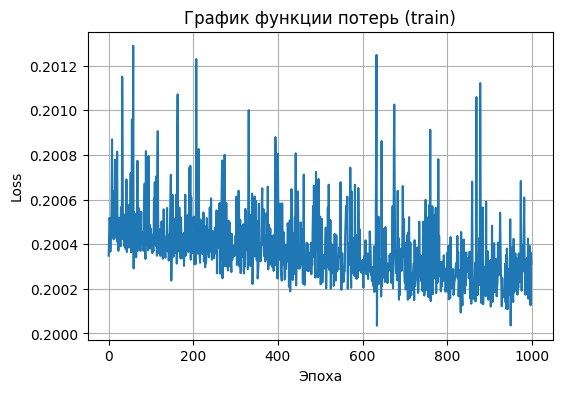

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(history.history['loss'])
plt.title("График функции потерь (train)")
plt.xlabel("Эпоха")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

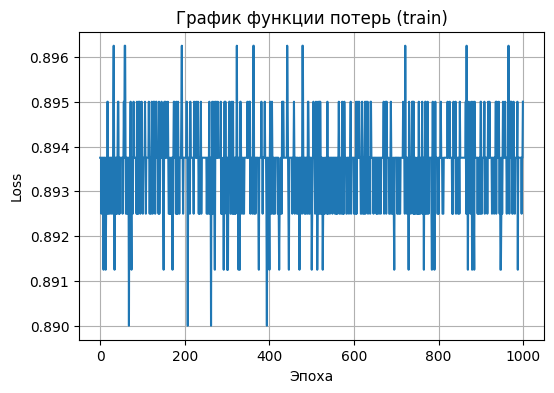

In [36]:
plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'])
plt.title("График функции потерь (train)")
plt.xlabel("Эпоха")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

In [28]:
train_loss = history.history['accuracy']
val_loss = history.history['val_accuracy']
epochs = list(range(1, len(train_loss) + 1))

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=epochs,
    y=train_loss,
    mode='lines',
    name='Train Accuracy'
))

fig.add_trace(go.Scatter(
    x=epochs,
    y=val_loss,
    mode='lines',
    name='Val Accuracy'
))

fig.update_layout(
    title='Train/Val Accuracy',
    xaxis_title='Эпоха',
    yaxis_title='Loss',
    width=800,
    height=500,
    plot_bgcolor='white'
)

fig.show()

In [30]:
y_pred = (model.predict(X_test) >= 0.5).astype(int)
acc = accuracy_score(y_test, y_pred)
print("Точность на тесте:", acc)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Точность на тесте: 0.93


In [34]:
y_test_proba = model.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = roc_auc_score(y_test, y_test_proba)

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=fpr,
    y=tpr,
    mode='lines',
    name=f'ROC curve (AUC = {roc_auc:.3f})'
))

fig.add_trace(go.Scatter(
    x=[0, 1],
    y=[0, 1],
    mode='lines',
    name='Random',
    line=dict(dash='dash')
))

fig.update_layout(
    title='ROC-кривая',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    width=700,
    height=500,
    plot_bgcolor='white'
)

fig.show()


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
